# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
# https://www.kaggle.com/code/varun97531/notebook55788fa218
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

For linear regression we have find the correct values of slope(m), intercept(b). For that we will we use the rmse error and try to reduce the formula to its differentiated form and will aplly gradient descent on that
to find the minima of m, b
And we will use that m, b to find the predicted values of test data

There is no such hard and fast rule to find epochs, alpha value we have to manually try for all of these values.

In [19]:
# 1.3.1.2
# implement Linear Regression

def loss_function(m, b, x_train, y_train):
    total_error = 0
    for i in range(len(x_train)):
        x_train[i] = np.array(x_train[i])
        y_train[i] = np.array(y_train[i])
        m = np.array(m)
#         y1 = x_train*m+b
        y1 = np.dot(x_train[i], m) + b
        total_error += (y_train[i] - y1)**2
    total_error /= len(x_train)
    return total_error



def gradient_descent(curr_m, curr_b, x_train, y_train, alpha):
    m_gradient = [0]*(len(x_train[0]))
    b_gradient = 0
    curr_m = np.array(curr_m)
    n = len(x_train[0])
    
    for i in range(len(x_train)):
#         x = points.iloc[i].area
#         x_train = np.array(points[i][0]) 
#         y_train = np.array(points[i][1])
        x_train[i] = np.array(x_train[i])
        y_train[i] = np.array(y_train[i])
        
        m_gradient += -(2/n) * (y_train[i] - (x_train[i].dot(curr_m) + curr_b)) * alpha * x_train[i]
        b_gradient += -(2/n) * (y_train[i] - (x_train[i].T.dot(curr_m) + curr_b)) * alpha
#         print("SIZE : ", b_gradient)
    m = curr_m - m_gradient * alpha
    b = curr_b - b_gradient * alpha
    return m, b


# epoch, error_per = [], []
def loop(x_train, y_train, alpha=0.09, epochs = 100000):
    m = [0]*len(x_train[0])
    b = 0
#     epochs = 200
    epochs += 1
    for i in range(epochs):
        if(i%100 == 0):
            error_per.append(loss_function(m, b, x_train, y_train))
            epoch.append(i)
            print(f"Epoch : {i}", "Error :", error_per[-1])
        m, b = gradient_descent(m, b, x_train, y_train, alpha)
#     print(f"Error : {loss_function(m, b, x_train, y_train)}")
    return m, b, epoch, error_per

In [20]:
# 1.3.2.3
# try with different learning rates and choose the best one
epoch, error_per = [], []
m, b, epoch, error_per = loop(x_train, y_train, 0.1, 7000)
# print("+"*60)
# print(m)
# print("="*30)
# print(b)

Epoch : 0 Error : 6.153571509462105
Epoch : 100 Error : 0.04340921329168513
Epoch : 200 Error : 0.016871917890291348
Epoch : 300 Error : 0.01078390573860139
Epoch : 400 Error : 0.007857641019179028
Epoch : 500 Error : 0.006071299973765936
Epoch : 600 Error : 0.00481524715234538
Epoch : 700 Error : 0.0038732621499707447
Epoch : 800 Error : 0.00314853203658555
Epoch : 900 Error : 0.0025854768413681637
Epoch : 1000 Error : 0.0021462921601432677
Epoch : 1100 Error : 0.0018030474828763861
Epoch : 1200 Error : 0.001534403851671298
Epoch : 1300 Error : 0.0013238527195140945
Epoch : 1400 Error : 0.0011585643965045596
Epoch : 1500 Error : 0.001028551975153158
Epoch : 1600 Error : 0.0009260368730559364
Epoch : 1700 Error : 0.0008449592183216696
Epoch : 1800 Error : 0.0007805976915370156
Epoch : 1900 Error : 0.0007292737057688213
Epoch : 2000 Error : 0.0006881210338113327
Epoch : 2100 Error : 0.0006549063530264406
Epoch : 2200 Error : 0.0006278894398953022
Epoch : 2300 Error : 0.00060571424996117

71


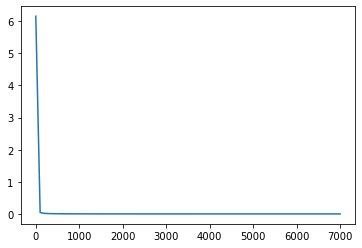

In [21]:
# epoch, error_per
print(len(epoch))
plt.plot(epoch, error_per)
plt.show()
# print(error_per[-1])

In [22]:
epoch, error_per = [], []
m, b, epoch, error_per = loop(x_train, y_train, 0.01, 70000)

Epoch : 0 Error : 6.153571509462105
Epoch : 100 Error : 5.24437289114457
Epoch : 200 Error : 4.536248764590365
Epoch : 300 Error : 3.972929735147507
Epoch : 400 Error : 3.5163924494923453
Epoch : 500 Error : 3.1403658987080716
Epoch : 600 Error : 2.826277263473374
Epoch : 700 Error : 2.5606939397835933
Epoch : 800 Error : 2.3336885515599173
Epoch : 900 Error : 2.137777627157968
Epoch : 1000 Error : 1.9672202104362375
Epoch : 1100 Error : 1.8175449653130116
Epoch : 1200 Error : 1.685224401994748
Epoch : 1300 Error : 1.567445423353133
Epoch : 1400 Error : 1.4619441392233372
Epoch : 1500 Error : 1.366884463052841
Epoch : 1600 Error : 1.280767194564376
Epoch : 1700 Error : 1.202360802985933
Epoch : 1800 Error : 1.1306479890858343
Epoch : 1900 Error : 1.0647839481529322
Epoch : 2000 Error : 1.0040634632689696
Epoch : 2100 Error : 0.9478947636934719
Epoch : 2200 Error : 0.8957786318781904
Epoch : 2300 Error : 0.8472916246495928
Epoch : 2400 Error : 0.8020725459824847
Epoch : 2500 Error : 0.7

Epoch : 19800 Error : 0.017112905401806617
Epoch : 19900 Error : 0.017017110345215917
Epoch : 20000 Error : 0.01692236076513962
Epoch : 20100 Error : 0.01682863792156891
Epoch : 20200 Error : 0.016735923638292013
Epoch : 20300 Error : 0.016644200278351097
Epoch : 20400 Error : 0.016553450720733224
Epoch : 20500 Error : 0.016463658338232306
Epoch : 20600 Error : 0.01637480697641919
Epoch : 20700 Error : 0.016286880933663338
Epoch : 20800 Error : 0.01619986494214972
Epoch : 20900 Error : 0.016113744149839602
Epoch : 21000 Error : 0.016028504103326627
Epoch : 21100 Error : 0.015944130731539663
Epoch : 21200 Error : 0.015860610330250085
Epoch : 21300 Error : 0.015777929547340235
Epoch : 21400 Error : 0.015696075368794395
Epoch : 21500 Error : 0.015615035105373768
Epoch : 21600 Error : 0.015534796379940935
Epoch : 21700 Error : 0.0154553471153987
Epoch : 21800 Error : 0.015376675523213038
Epoch : 21900 Error : 0.015298770092488444
Epoch : 22000 Error : 0.015221619579568142
Epoch : 22100 Err

Epoch : 39000 Error : 0.008093504458884229
Epoch : 39100 Error : 0.008070457630909546
Epoch : 39200 Error : 0.008047524765021692
Epoch : 39300 Error : 0.00802470485625325
Epoch : 39400 Error : 0.008001996911317059
Epoch : 39500 Error : 0.007979399948460112
Epoch : 39600 Error : 0.007956912997318993
Epoch : 39700 Error : 0.007934535098777559
Epoch : 39800 Error : 0.007912265304826154
Epoch : 39900 Error : 0.007890102678422791
Epoch : 40000 Error : 0.007868046293355989
Epoch : 40100 Error : 0.007846095234109516
Epoch : 40200 Error : 0.007824248595728734
Epoch : 40300 Error : 0.007802505483688646
Epoch : 40400 Error : 0.0077808650137638135
Epoch : 40500 Error : 0.007759326311899656
Epoch : 40600 Error : 0.007737888514085737
Epoch : 40700 Error : 0.007716550766230246
Epoch : 40800 Error : 0.007695312224036565
Epoch : 40900 Error : 0.007674172052880986
Epoch : 41000 Error : 0.007653129427692234
Epoch : 41100 Error : 0.007632183532832457
Epoch : 41200 Error : 0.0076113335619796855
Epoch : 41

Epoch : 58100 Error : 0.0050303525130413005
Epoch : 58200 Error : 0.005018979819473663
Epoch : 58300 Error : 0.005007640228558148
Epoch : 58400 Error : 0.004996333595260572
Epoch : 58500 Error : 0.004985059775703699
Epoch : 58600 Error : 0.004973818627154302
Epoch : 58700 Error : 0.004962610008010325
Epoch : 58800 Error : 0.004951433777788116
Epoch : 58900 Error : 0.0049402897971100165
Epoch : 59000 Error : 0.0049291779276919075
Epoch : 59100 Error : 0.004918098032331077
Epoch : 59200 Error : 0.004907049974894106
Epoch : 59300 Error : 0.004896033620304936
Epoch : 59400 Error : 0.004885048834533162
Epoch : 59500 Error : 0.004874095484582357
Epoch : 59600 Error : 0.004863173438478671
Epoch : 59700 Error : 0.004852282565259345
Epoch : 59800 Error : 0.004841422734961753
Epoch : 59900 Error : 0.0048305938186121
Epoch : 60000 Error : 0.004819795688214639
Epoch : 60100 Error : 0.004809028216740869
Epoch : 60200 Error : 0.0047982912781188184
Epoch : 60300 Error : 0.004787584747222657
Epoch : 6

701


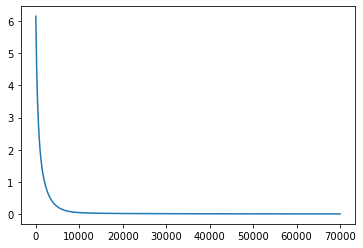

In [23]:
# epoch, error_per
print(len(epoch))
plt.plot(epoch, error_per)
plt.show()
# print(error_per[-1])

In [24]:
epoch, error_per = [], []
m, b, epoch, error_per = loop(x_train, y_train, 1, 1000)

Epoch : 0 Error : 6.153571509462105
Epoch : 100 Error : 5.24437289114457
Epoch : 200 Error : 4.536248764590365
Epoch : 300 Error : 3.972929735147507
Epoch : 400 Error : 3.5163924494923453
Epoch : 500 Error : 3.1403658987080716
Epoch : 600 Error : 2.826277263473374
Epoch : 700 Error : 2.5606939397835933
Epoch : 800 Error : 2.3336885515599173
Epoch : 900 Error : 2.137777627157968
Epoch : 1000 Error : 1.9672202104362375
Epoch : 1100 Error : 1.8175449653130116
Epoch : 1200 Error : 1.685224401994748
Epoch : 1300 Error : 1.567445423353133
Epoch : 1400 Error : 1.4619441392233372
Epoch : 1500 Error : 1.366884463052841
Epoch : 1600 Error : 1.280767194564376
Epoch : 1700 Error : 1.202360802985933
Epoch : 1800 Error : 1.1306479890858343
Epoch : 1900 Error : 1.0647839481529322
Epoch : 2000 Error : 1.0040634632689696
Epoch : 2100 Error : 0.9478947636934719
Epoch : 2200 Error : 0.8957786318781904
Epoch : 2300 Error : 0.8472916246495928
Epoch : 2400 Error : 0.8020725459824847
Epoch : 2500 Error : 0.7

Epoch : 19800 Error : 0.017112905401806617
Epoch : 19900 Error : 0.017017110345215917
Epoch : 20000 Error : 0.01692236076513962
Epoch : 20100 Error : 0.01682863792156891
Epoch : 20200 Error : 0.016735923638292013
Epoch : 20300 Error : 0.016644200278351097
Epoch : 20400 Error : 0.016553450720733224
Epoch : 20500 Error : 0.016463658338232306
Epoch : 20600 Error : 0.01637480697641919
Epoch : 20700 Error : 0.016286880933663338
Epoch : 20800 Error : 0.01619986494214972
Epoch : 20900 Error : 0.016113744149839602
Epoch : 21000 Error : 0.016028504103326627
Epoch : 21100 Error : 0.015944130731539663
Epoch : 21200 Error : 0.015860610330250085
Epoch : 21300 Error : 0.015777929547340235
Epoch : 21400 Error : 0.015696075368794395
Epoch : 21500 Error : 0.015615035105373768
Epoch : 21600 Error : 0.015534796379940935
Epoch : 21700 Error : 0.0154553471153987
Epoch : 21800 Error : 0.015376675523213038
Epoch : 21900 Error : 0.015298770092488444
Epoch : 22000 Error : 0.015221619579568142
Epoch : 22100 Err

Epoch : 39000 Error : 0.008093504458884229
Epoch : 39100 Error : 0.008070457630909546
Epoch : 39200 Error : 0.008047524765021692
Epoch : 39300 Error : 0.00802470485625325
Epoch : 39400 Error : 0.008001996911317059
Epoch : 39500 Error : 0.007979399948460112
Epoch : 39600 Error : 0.007956912997318993
Epoch : 39700 Error : 0.007934535098777559
Epoch : 39800 Error : 0.007912265304826154
Epoch : 39900 Error : 0.007890102678422791
Epoch : 40000 Error : 0.007868046293355989
Epoch : 40100 Error : 0.007846095234109516
Epoch : 40200 Error : 0.007824248595728734
Epoch : 40300 Error : 0.007802505483688646
Epoch : 40400 Error : 0.0077808650137638135
Epoch : 40500 Error : 0.007759326311899656
Epoch : 40600 Error : 0.007737888514085737
Epoch : 40700 Error : 0.007716550766230246
Epoch : 40800 Error : 0.007695312224036565
Epoch : 40900 Error : 0.007674172052880986
Epoch : 41000 Error : 0.007653129427692234
Epoch : 41100 Error : 0.007632183532832457
Epoch : 41200 Error : 0.0076113335619796855
Epoch : 41

Epoch : 58100 Error : 0.0050303525130413005
Epoch : 58200 Error : 0.005018979819473663
Epoch : 58300 Error : 0.005007640228558148
Epoch : 58400 Error : 0.004996333595260572
Epoch : 58500 Error : 0.004985059775703699
Epoch : 58600 Error : 0.004973818627154302
Epoch : 58700 Error : 0.004962610008010325
Epoch : 58800 Error : 0.004951433777788116
Epoch : 58900 Error : 0.0049402897971100165
Epoch : 59000 Error : 0.0049291779276919075
Epoch : 59100 Error : 0.004918098032331077
Epoch : 59200 Error : 0.004907049974894106
Epoch : 59300 Error : 0.004896033620304936
Epoch : 59400 Error : 0.004885048834533162
Epoch : 59500 Error : 0.004874095484582357
Epoch : 59600 Error : 0.004863173438478671
Epoch : 59700 Error : 0.004852282565259345
Epoch : 59800 Error : 0.004841422734961753
Epoch : 59900 Error : 0.0048305938186121
Epoch : 60000 Error : 0.004819795688214639
Epoch : 60100 Error : 0.004809028216740869
Epoch : 60200 Error : 0.0047982912781188184
Epoch : 60300 Error : 0.004787584747222657
Epoch : 6

In [ ]:
# epoch, error_per
print(len(epoch))
plt.plot(epoch, error_per)
plt.show()
# print(error_per[-1])

In [6]:
y_pred = [0]*len(x_test)
# x_test = np.array(x_test)
m = np.array(m)
# print("="*60)
# print(b)
# print("="*60)
# print(m)
# print("="*60)
for i in range(len(x_test)):
    x_test[i] = np.array(x_test[i])
    y_pred[i] = (x_test[i].T.dot(m))+ b
#     print(y_pred[i], f"Length : {len(x_test[i])}, {len(m)}")
    
y_test = np.array(y_test)

# print(len(y_test), len(y_pred))
# print("="*30)
# print(y_test)
# print("="*30)
# print(y_pred)

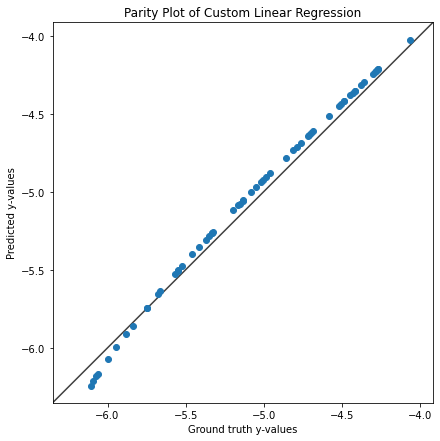

In [7]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
 Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
 
 formula = error + α * (sum of square of coefficients)

In [10]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`


In [11]:
def ridge_reg(alpha):
    classifier = Ridge(alpha = alpha)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print(f"Alpha : {alpha}, R2 score : {r2_score(y_test, y_pred)}, RMSE score : {np.sqrt(mean_squared_error(y_test, y_pred))}")
    return np.sqrt(mean_squared_error(y_test, y_pred)), y_pred

In [27]:
l1, l2 = [], []
for alpha in np.arange(0, 1.1, 0.1):
    l1.append(alpha)
    a, y_pred = ridge_reg(alpha)
    l2.append(a)
#     print(alpha)

Alpha : 0.0, R2 score : 0.9999999999997027, RMSE score : 3.148877223582221e-07
Alpha : 0.1, R2 score : 0.9641506175842176, RMSE score : 0.10934861996812047
Alpha : 0.2, R2 score : 0.9864849979028215, RMSE score : 0.06713987462441666
Alpha : 0.30000000000000004, R2 score : 0.9888369666652796, RMSE score : 0.06101878812668691
Alpha : 0.4, R2 score : 0.9891767727541638, RMSE score : 0.06008289575137136
Alpha : 0.5, R2 score : 0.9890262686708988, RMSE score : 0.060499199566566686
Alpha : 0.6000000000000001, R2 score : 0.9885689152492861, RMSE score : 0.06174704655451432
Alpha : 0.7000000000000001, R2 score : 0.9878777576058912, RMSE score : 0.06358635774642998
Alpha : 0.8, R2 score : 0.9870151458758467, RMSE score : 0.06580986572737013
Alpha : 0.9, R2 score : 0.986027686491885, RMSE score : 0.06826634135830059
Alpha : 1.0, R2 score : 0.9849409985959825, RMSE score : 0.07087132528641528


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

If the coefficients take large values the optimization function is penalized such that after a certain point if we increase the coefficient than the model will starts underfitting instead of regularizing, and if we gives very small values the model will overfit so we have to maintain the balance such that the model will regularize instead of overfitting, underfitting

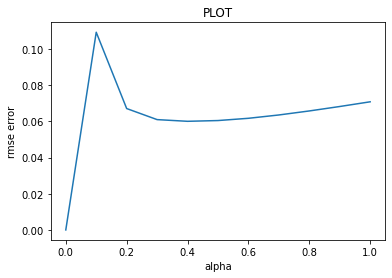

In [28]:
# 1.3.2.4
plt.plot(l1, l2)
plt.xlabel('alpha')
plt.ylabel('rmse error')
plt.title('PLOT')
plt.show()

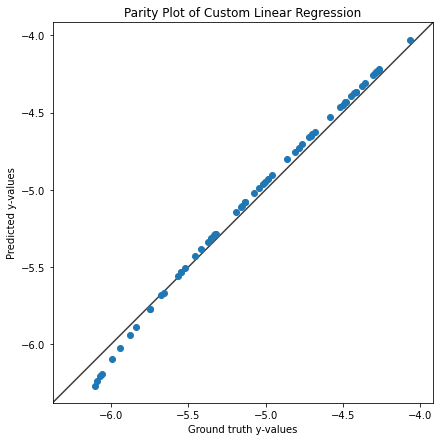

In [14]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

Lasso regression not only helps in reducing over-fitting but it can help us in feature selection, it performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients.

formual = error + α * (sum of absolute value of coefficients)

In [15]:
# 1.3.3.2
from sklearn.linear_model import Lasso

# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
def lasso_reg(alpha):
    classifier = Lasso(alpha = alpha)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print(f"Alpha : {alpha}, R2 score : {r2_score(y_test, y_pred)}, RMSE score : {np.sqrt(mean_squared_error(y_test, y_pred))}")
    return np.sqrt(mean_squared_error(y_test, y_pred)), y_pred

In [29]:
l1, l2 = [], []
for alpha in np.arange(0, 1.1, 0.1):
    l1.append(alpha)
    a, y_pred = ridge_reg(alpha)
    l2.append(a)
#     print(alpha)

Alpha : 0.0, R2 score : 0.9999999999997027, RMSE score : 3.148877223582221e-07
Alpha : 0.1, R2 score : 0.9641506175842176, RMSE score : 0.10934861996812047
Alpha : 0.2, R2 score : 0.9864849979028215, RMSE score : 0.06713987462441666
Alpha : 0.30000000000000004, R2 score : 0.9888369666652796, RMSE score : 0.06101878812668691
Alpha : 0.4, R2 score : 0.9891767727541638, RMSE score : 0.06008289575137136
Alpha : 0.5, R2 score : 0.9890262686708988, RMSE score : 0.060499199566566686
Alpha : 0.6000000000000001, R2 score : 0.9885689152492861, RMSE score : 0.06174704655451432
Alpha : 0.7000000000000001, R2 score : 0.9878777576058912, RMSE score : 0.06358635774642998
Alpha : 0.8, R2 score : 0.9870151458758467, RMSE score : 0.06580986572737013
Alpha : 0.9, R2 score : 0.986027686491885, RMSE score : 0.06826634135830059
Alpha : 1.0, R2 score : 0.9849409985959825, RMSE score : 0.07087132528641528


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized such that after a certain point if we increase the coefficient than the model will starts underfitting instead of regularizing, Wherever the slope is very less those feature will be removed, which means those features are not important for predicting the line. Here also we have to maintain a goog lambda so that it regularizes to the data efficiently.

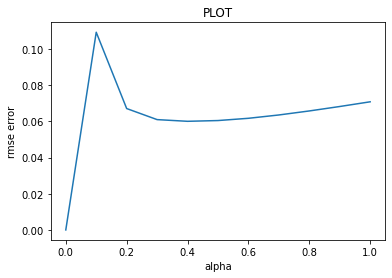

In [30]:
# 1.3.3.4
plt.plot(l1, l2)
plt.xlabel('alpha')
plt.ylabel('rmse error')
plt.title('PLOT')
plt.show()

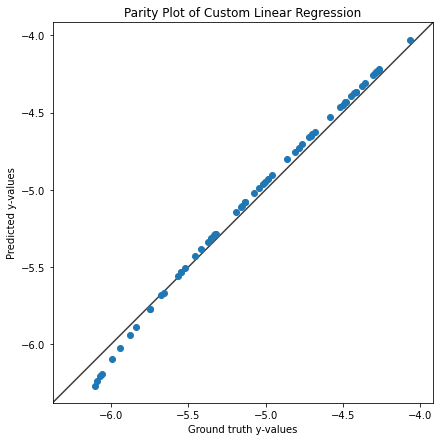

In [18]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()